# VA Coursework - Dimitrios Megkos 210034034
## Research questions:
### 1) How have crime patterns changed throughout the years?
### 2) How did the Covid-19 pandemic affect crime patterns?
### 3) Which district has the most effective police department?
### 4) Which wards are the most dangerous and which areas are the most safe to live?

#### Import Libraries
Importing mandatory libraries used for data processing, visualisation, and clustering.

In [1]:
#basic imports
import pandas as pd
import numpy as np

#visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#clustering
from sklearn.cluster import KMeans

#### Load Chicago Crime dataset
Reading the csv file and storing the dataset into a Pandas dataframe.

In [2]:
#load dataset
chicago = pd.read_csv('chicago_crime_100k.csv')

The dataset contains reported crime incidents that happened in the city of Chicago from January 2001 to December 2021. Data is provided by Chicago Police Department and downloaded from Google Cloud as a BigQuery public dataset.

#### Dataset exploration and descriptive statistics
Exploring the dataset and creating basic plots.

In [3]:
#general information
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   unique_key            100000 non-null  int64  
 1   case_number           99999 non-null   object 
 2   date                  100000 non-null  object 
 3   block                 100000 non-null  object 
 4   iucr                  100000 non-null  object 
 5   primary_type          100000 non-null  object 
 6   description           100000 non-null  object 
 7   location_description  99869 non-null   object 
 8   arrest                100000 non-null  bool   
 9   domestic              100000 non-null  bool   
 10  beat                  100000 non-null  int64  
 11  district              100000 non-null  int64  
 12  ward                  99990 non-null   float64
 13  community_area        100000 non-null  int64  
 14  fbi_code              100000 non-null  object 
 15  x

There are one hundred thousand rows, each row representing a crime incident, and twenty-two columns which are the crime incident features. Each feature provides information about each crime that happened, with the most important ones being the type of crime, the location it happened, the date, an arrest indicator, and a domestic violence indicator. The dataset contains four different data types namely boolean (two columns), float (four columns), integer (six columns) and object (ten columns).

In [4]:
#first 10 rows of dataset
chicago.head(10)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,6465561,HP543091,2008-08-30 04:45:00 UTC,115XX S COTTAGE GROVE AVE,0313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,SIDEWALK,False,False,...,9.0,54,03,1181500.0,1828663.0,2008,2018-02-28 03:56:25 UTC,41.685083,-87.611202,"(41.68508339, -87.611201716)"
1,9744164,HX393805,2014-08-19 12:20:00 UTC,001XX W 51ST ST,3960,INTIMIDATION,INTIMIDATION,GOVERNMENT BUILDING/PROPERTY,False,False,...,3.0,37,26,1176005.0,1871170.0,2014,2018-02-10 03:50:01 UTC,41.801853,-87.630046,"(41.801852528, -87.630045663)"
2,2238983,HH511796,2002-07-15 11:00:00 UTC,026XX S SHIELDS AVE,3960,INTIMIDATION,INTIMIDATION,RESIDENCE,False,False,...,11.0,34,26,1174393.0,1886883.0,2002,2018-10-26 04:01:05 UTC,41.845006,-87.635489,"(41.845006442, -87.63548942)"
3,3504057,HK579043,2004-08-24 07:15:00 UTC,030XX S WELLS ST,0530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,11.0,34,04A,1175114.0,1884756.0,2004,2018-02-28 03:56:25 UTC,41.839154,-87.632907,"(41.83915368, -87.632907126)"
4,11599181,JC156641,2019-02-18 09:09:00 UTC,037XX S LA SALLE ST,502R,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,STREET,True,False,...,3.0,34,26,1176019.0,1880386.0,2019,2019-02-25 04:30:21 UTC,41.827142,-87.629718,"(41.827141747, -87.629717577)"
5,7602749,HS407718,2010-07-12 04:20:00 UTC,035XX S LA SALLE ST,0880,THEFT,PURSE-SNATCHING,STREET,False,False,...,3.0,34,06,1175987.0,1881443.0,2010,2018-02-10 03:50:01 UTC,41.830043,-87.629803,"(41.830042962, -87.629803222)"
6,5551397,HN355771,2007-05-21 12:10:00 UTC,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, BUILDING",True,False,...,39.0,13,15,1152801.0,1933422.0,2007,2018-02-10 03:50:01 UTC,41.973168,-87.713495,"(41.973167821, -87.713495268)"
7,10260892,HY448497,2015-10-03 06:37:00 UTC,051XX S WENTWORTH AVE,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,POLICE FACILITY/VEH PARKING LOT,True,False,...,3.0,37,08B,1175826.0,1871120.0,2015,2018-02-10 03:50:01 UTC,41.801719,-87.630704,"(41.80171934, -87.630703621)"
8,4354611,HL580050,2005-08-29 06:00:00 UTC,051XX S WENTWORTH AVE,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,STREET,True,False,...,3.0,37,26,1175826.0,1871120.0,2005,2018-02-10 03:50:01 UTC,41.801719,-87.630704,"(41.80171934, -87.630703621)"
9,6411783,HP495995,2008-08-05 06:00:00 UTC,005XX E 115TH ST,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",STREET,False,False,...,9.0,54,07,1181652.0,1828798.0,2008,2018-02-10 03:50:01 UTC,41.685450,-87.610641,"(41.685450352, -87.610641141)"


In [5]:
#check for null values
chicago.isnull().sum()

unique_key                0
case_number               1
date                      0
block                     0
iucr                      0
primary_type              0
description               0
location_description    131
arrest                    0
domestic                  0
beat                      0
district                  0
ward                     10
community_area            0
fbi_code                  0
x_coordinate            951
y_coordinate            951
year                      0
updated_on                0
latitude                949
longitude               949
location                949
dtype: int64

The dataset was checked for any null values. There are 131 crime incidents missing location description, one missing case_number, ten missing ward, and 949 that are missing the location. Because the location is important for the analysis and considering the small amount of missing data, these records can be removed from the dataset. The one with missing case_number and those with missing ward can be removed too. As for the records with missing location description, they will be added to the "OTHER" category.

In [6]:
#get index of records with missing case number
missing_index = chicago[chicago['case_number'].isnull()].index
#delete records with missing case number
chicago.drop(index=missing_index, inplace=True)
#get index of records with missing location
missing_index = chicago[chicago['location'].isnull()].index
#delete records with missing location
chicago.drop(index=missing_index, inplace=True)
#get index of records with missing ward
missing_index = chicago[chicago['ward'].isnull()].index
#delete records with missing ward
chicago.drop(index=missing_index, inplace=True)
#get index of records with missing coordinates
missing_index = chicago[chicago['x_coordinate'].isnull()].index
#delete records with missing coordinates
chicago.drop(index=missing_index, inplace=True)
#get index of records with missing location description
missing_index = chicago[chicago['location_description'].isnull()].index
#replace missing location with 'OTHER'
chicago.loc[chicago[chicago['location_description'].isnull()].index,'location_description'] = 'OTHER'

#### Add year column and drop 2001 due to low crime data

In [7]:
#get 2001 index
year_index = chicago[chicago['year']==2001].index
#drop incidents that happened on 2001
chicago.drop(index=year_index, inplace=True)

#### Plot crime categories

In [8]:
chicago['primary_type'].unique()

array(['ROBBERY', 'INTIMIDATION', 'ASSAULT', 'OTHER OFFENSE', 'THEFT',
       'WEAPONS VIOLATION', 'BATTERY', 'NARCOTICS', 'MOTOR VEHICLE THEFT',
       'INTERFERENCE WITH PUBLIC OFFICER', 'DECEPTIVE PRACTICE',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL DAMAGE',
       'CRIM SEXUAL ASSAULT', 'HOMICIDE', 'BURGLARY', 'PROSTITUTION',
       'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'SEX OFFENSE',
       'CRIMINAL TRESPASS', 'STALKING', 'HUMAN TRAFFICKING', 'ARSON',
       'KIDNAPPING', 'NON - CRIMINAL', 'GAMBLING',
       'CRIMINAL SEXUAL ASSAULT', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'CONCEALED CARRY LICENSE VIOLATION',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL'],
      dtype=object)

In [9]:
#create new dataframe with number of crime types
crime_types = pd.DataFrame(data=chicago.groupby('primary_type', as_index=False).size())
#sort by size to show most common type of crimes first
crime_types.sort_values('size', ascending=False, inplace=True)

There are thirty-four unique crime types. The two figures below show the top five most common crime types of all time. Theft is number one followed by battery and criminal damage.

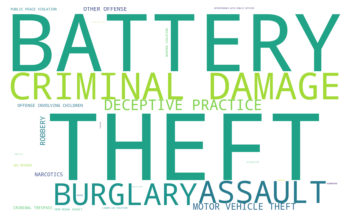

In [10]:
#convert to dictionary
data = dict(zip(crime_types['primary_type'].tolist(), crime_types['size'].tolist()))
# Create the wordcloud object
wordcloud = WordCloud(background_color='white',width=1600, height=980).generate_from_frequencies(data)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

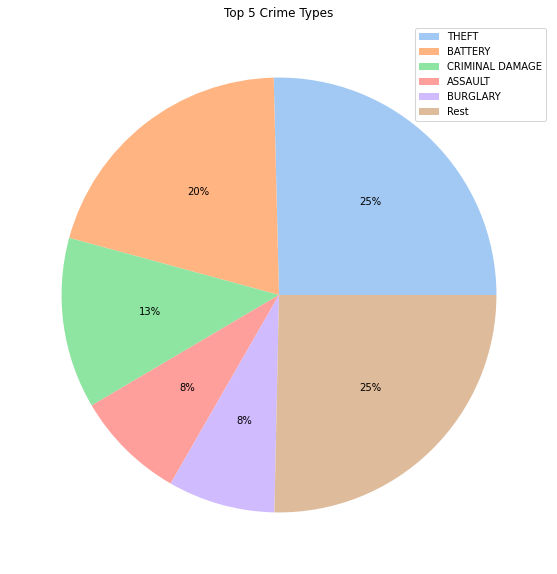

In [11]:
all_other=crime_types[5:]['size'].sum()
drop_index=crime_types[5:].index
crime_types.drop(index=drop_index,inplace=True)
crime_types.loc[5]=['Rest',all_other]
#create pie chart showing top 5 crime types
#define data
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]
data = crime_types['size']
labels = crime_types['primary_type']
plt.figure(figsize=(10,10))
#create pie chart
plt.pie(data,colors = colors, autopct='%.0f%%')
plt.legend(labels)
plt.title('Top 5 Crime Types')
plt.show()

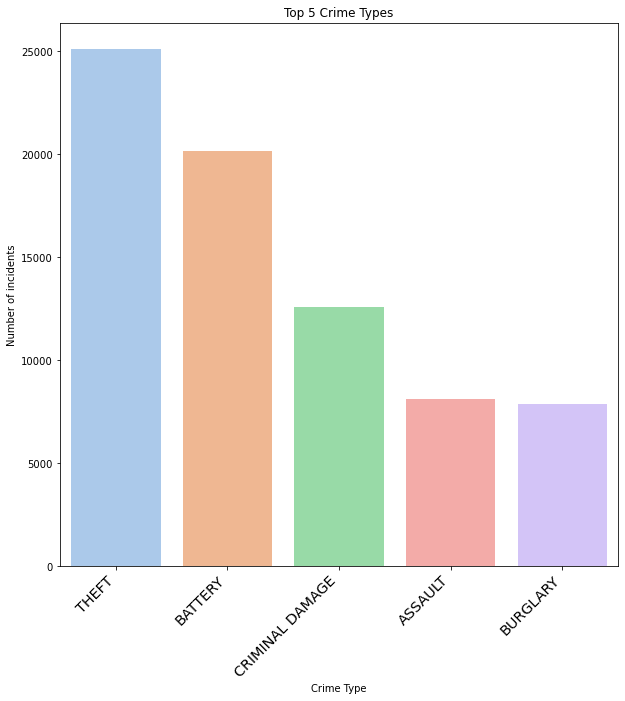

In [12]:
#bar plot showing top 5 crime types
plt.figure(figsize=(10,10))
sns.set_palette("pastel")
sns.barplot(x=labels[:5], y=data[:5])
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.title('Top 5 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of incidents')
plt.show()

### 1) How have crime patterns changed throughout the years?

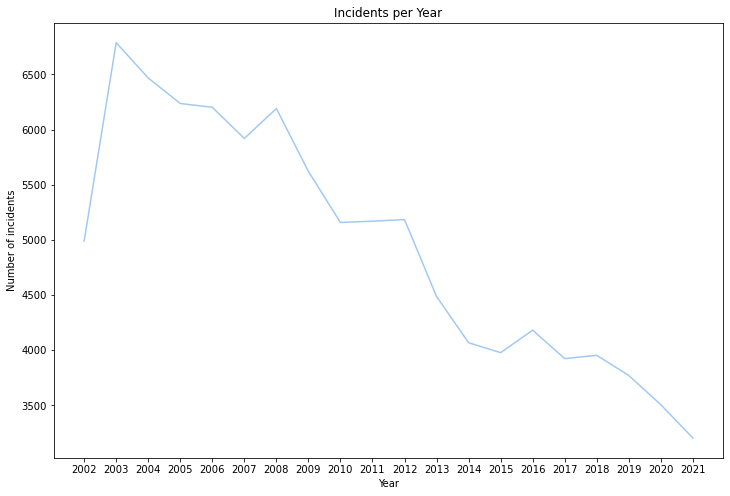

In [13]:
#plot total crimes per year to see if they are increasing or decreasing
#store number of incidents per year
plt.figure(figsize=[12,8])
crimes_per_year=chicago.groupby(by='year', as_index=False).size()
sns.lineplot(x=crimes_per_year['year'], y=crimes_per_year['size'])
plt.title('Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of incidents')
plt.xticks(np.arange(2002,2022,1))
plt.show()

According to the lineplot, 2003 was the year with the most reported crime incidents of all time with more than 6500 incidents, following a rapid increase from 2002. From that point onwards, crime has been steadily decreasing every year, with years 2008, 2012, 2016, and 2018 being an exception having a minor increase in the number of incidents compared to the year before. Overall, the results are encouraging since there are now less than half crime incidents happening in the city of Chicago, compared to year 2003, and, according to the figure above, it looks like this number will further decrease.

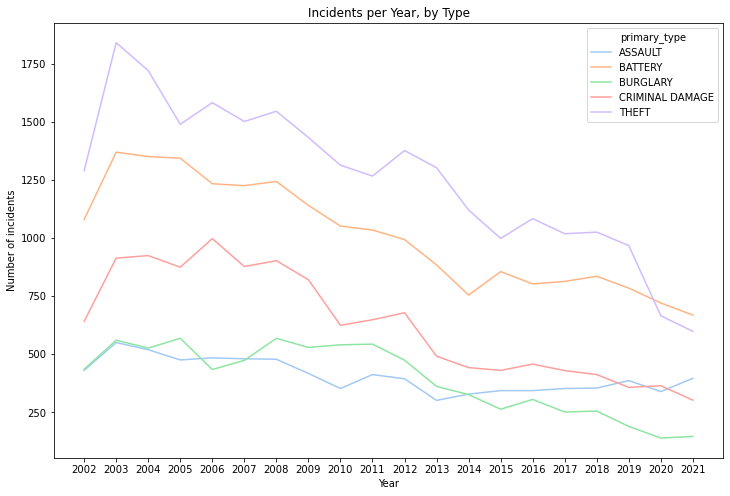

In [14]:
#plot top 5 crimes each year to see if the pattern changes
categories_per_year=chicago.groupby(by=['primary_type','year'], as_index=False).size()
cond_top5=(categories_per_year['primary_type']=='THEFT') | (categories_per_year['primary_type']=='BATTERY') | (categories_per_year['primary_type']=='CRIMINAL DAMAGE') | (categories_per_year['primary_type']=='ASSAULT') | (categories_per_year['primary_type']=='BURGLARY')
fig = plt.figure(figsize=[12,8])
sns.lineplot(x=categories_per_year[cond_top5]['year'], y=categories_per_year[cond_top5]['size'],hue=categories_per_year[cond_top5]['primary_type'])
plt.title('Incidents per Year, by Type')
plt.xlabel('Year')
plt.ylabel('Number of incidents')
plt.xticks(np.arange(2002,2022,1))
plt.show()

Looking at the behaviour of the top five crime types throughout the years, similar patterns were identified. The number of reported Theft, Battery, Criminal Damage, and Burglary incidents decreased while Assault incidents, though they slightly decreased at first, remained mostly the same.

### 2) How did the Covid-19 pandemic affect crime patterns?
The figures below were created in Tableau.

<img src="Crime Locations 2016-2021.png" width="1000" height="600">

The dataset contains information on the description of the location each incident occurred. Some of the locations where most incidents happened are Residence, Street, Apartment, Sidewalk, Parking, and Others. In order to investigate whether the Covid-19 pandemic had any effect on the crime patterns or not, the last two years of the pandemic were compared to the previous years. According to the figure above, years 2016 to 2019 had similar patterns, with Residence incidents being around 35% of the total incidents, Street incidents being around 30%, and Apartment incidents being around 11%. However, after investigating 2020 and 2021, the years where lockdowns and home isolation were introduced, a few interesting differences were identified. Although the percentage of Street incidents remained the same, Residence incidents increased from 35% to 43% in both years and Apartment incidents increased from 11% to 17% in 2020 and to 20.5% in 2021. Figure below shows the percentage of Domestic and non Domestic incidents for years 2016 to 2021 where similar findings were identified. More specifically, domestic incidents increased from 17% (years 2018 and 2019) to 18.22% in 2020 and 21.19% in 2021. These findings suggest that the Covid-19 pandemic had a negative effect in patterns of crime. Although there were fewer people on the streets because of the lockdowns, more people were self-isolating in houses. These circumstances contributed greatly towards the increase of domestic violence incidents.

<img src="Domestic Crimes 2016-2021.png" width="400" height="560">

#### Preparing for the next two questions
Further data preparation was required in order to answer the last two questions. Columns that were not required for the analysis were dropped, arrest column was converted from boolean type to integer (1 where an arrest was made, 0 where not), and a new column was created to indicate if an incident is a serious crime or not. For the purpose of the analysis, a crime incident is considered serious if it belongs to one of the following types: CRIM SEXUAL ASSAULT, ASSAULT, CRIMINAL SEXUAL ASSAULT, KIDNAPPING. The analysis focused on crime incidents that happened the last five years to explore the trends.

In [15]:
#drop column index and any other not needed for the analysis
chicago.drop(columns=['case_number','block','iucr','beat','fbi_code','updated_on','x_coordinate','y_coordinate','location'], inplace=True)
#convert arrest column to int
chicago["arrest"] = chicago["arrest"].astype(int)
#create new dataframe with data from 2016 to 2021 only
chicago_1621=pd.DataFrame(data=chicago[chicago['year']>=2016], copy=True)
#reset index
chicago_1621.reset_index(inplace=True)
#drop index colum
chicago_1621.drop(columns='index',inplace=True)
#create condition with serious crimes
serious_crimes = (chicago_1621['primary_type']=='CRIM SEXUAL ASSAULT') | (chicago_1621['primary_type']=='CRIMINAL SEXUAL ASSAULT') | (chicago_1621['primary_type']=='ASSAULT') | (chicago_1621['primary_type']=='KIDNAPPING')
#add new column serious crime
chicago_1621['serious crime'] = serious_crimes.astype(int)

A new dataframe was created with district information, to answer question 3. The dataframe contains the mean location coordinates for each district, the total number of incidents and the number and percentage of arrests.

In [16]:
#get data
district_data=chicago_1621.groupby('district',as_index=False).agg(total_incidents=('unique_key','count'), arrests=('arrest','sum'), avg_lat=('latitude','mean'), avg_lon=('longitude','mean'))
#create new dataframe
districts_1621 = pd.DataFrame(data=district_data, copy=True)
#create column with arrests percentage
districts_1621["arrest percentage"] = 100*(districts_1621["arrests"]/districts_1621["total_incidents"])

In order to find the most dangerous areas and the areas that are safer for citizens to live and answer the second part of question four, kMeans clustering algorithm was implemented. All incidents were split into larger groups, based on the longitude and latitude coordinates of each incident. The dataset already contains information on each district, however clustering was used to cover greater areas on the map and get a holistic view.

#### kMeans Clustering

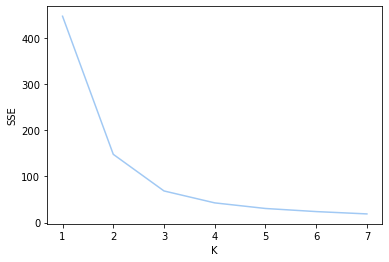

In [17]:
#number of k values to search
k_rng = range(1,8)
#array of sum of squared errors
sse = []
#iterate
for k in k_rng:
    km = KMeans(n_clusters=k) #set number of clusters
    km.fit(chicago_1621[['longitude','latitude']]) #fit
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)
plt.show()

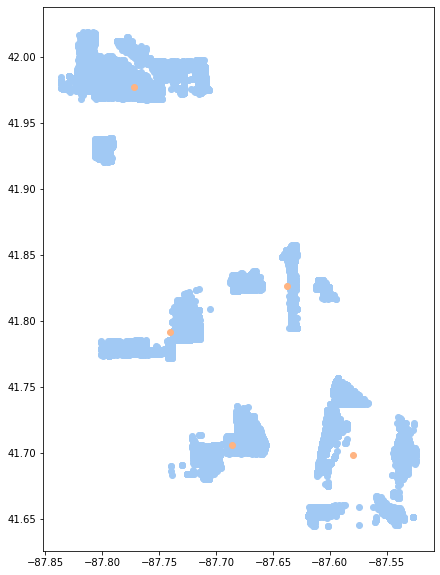

In [18]:
#create kmeans algorithm with five clusters
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(chicago_1621[['longitude','latitude']])
plt.figure(figsize=[7,10])
plt.scatter(chicago_1621['longitude'],chicago_1621['latitude'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])
plt.show()
#add new column to dataframe with cluster
chicago_1621["Cluster"] = y_predicted

Five clusters were used in order to split the map into five big areas were crimes took place the last five years.

A new dataframe was created with wards information, to answer the first part of question 4. The dataframe contains the mean location coordinates for each ward, the total number of incidents per ward, and the total number and percentage of serious incidents for each ward.

In [19]:
#get data
wards_data=chicago_1621.groupby('ward',as_index=False).agg(ward_total_incidents=('unique_key','count'), ward_serious_crimes=('serious crime','sum'), avg_lat=('latitude','mean'), avg_lon=('longitude','mean'))
#create new dataframe
wards_1621 = pd.DataFrame(data=wards_data, copy=True)
#add new column ward_serious_crimes_percentage
wards_1621["ward_scrimes_percentage"] = 100*(wards_1621["ward_serious_crimes"]/wards_1621["ward_total_incidents"])
#drop duplicate
wards_1621.drop(index=[6,9], inplace=True)
#reset index
wards_1621.reset_index(inplace=True)
#drop column index
wards_1621.drop(columns='index', inplace=True)

A new dataframe was created with clusters information, to answer the second part of question 4. The dataframe contains the mean location coordinates for each cluster, the total number of incidents per cluster, and the total number and percentage of serious incidents for each cluster.

In [20]:
#get data
cluster_data=chicago_1621.groupby('Cluster',as_index=False).agg(cluster_total_incidents=('unique_key','count'), cluster_serious_crimes=('serious crime','sum'), avg_lat=('latitude','mean'), avg_lon=('longitude','mean'))
#create dataframe
clusters_1621=pd.DataFrame(data=cluster_data, copy=True)
#create percentage
clusters_1621["cluster_scrimes_percentage"] = 100*(clusters_1621["cluster_serious_crimes"]/clusters_1621["cluster_total_incidents"])

#### Export both dataframes to csv to create images with Tableau.

In [21]:
#chicago.to_csv('chicago.csv')
#chicago_1621.to_csv('chicago_1621.csv')
#districts_1621.to_csv('districts_1621.csv')
#wards_1621.to_csv('wards_1621.csv')
#clusters_1621.to_csv('clusters_1621.csv')

### 3) Which district has the most effective police department?
The map below was created in Tableau.

<img src="Arrest Percentage per District 2016-2021.png" width="1000" height="600">

Using the arrest column of the districts dataframe, the district with the most effective police department was identified, by calculating the percentage of successful arrests of each district and visualizing it on a map. A red-white-green color range was used to better distinct lower (red) and higher (green) percentages. According to the figure above, though district 6 had the higher percentage of successful arrests (23.08%), it also had a very small number of crime incidents, hence there were not enough data to draw a conclusion of it's effectiveness. Therefore, considering the number of total incidents, the district effective police department is district five (19.40%), followed by district four (14.53%) and district nine (13.88%). The results overall were not encouraging since, at best, only twenty percent of the total incidents end up in an arrest. It is clear that every district's police department lacks personnel, especially those in northern Chicago.

### 4) Which wards are the most dangerous and which areas are the safest to live?
The maps below were created in Tableau.

<img src="Most Dangerous Wards 2016-2021.png" width="700" height="650">

Using the new wards dataframe, all twenty-two wards were visualised as circles on the map of Chicago. The size and the color of the circles were adjusted based on the number of incidents and the percentage of serious crimes that happened on each ward, during the last five years. A bigger circle means greater number of incidents. Similarly, more deeper red color means a higher percentage of serious crimes. According to the map above, ward nine is the most dangerous ward of Chicago, followed by ward three and wards eight and ten. There are more wards with a deep red color on the map however, their circle size is very small due to their number of incidents, therefore their percentage of serious crimes is not representative.

<img src="Most Dangerous Areas 2016-2021.png" width="700" height="650">

In order to find the most dangerous areas on the map and identify the locations that are safe for anyone that wants to move to Chicago, all incidents were grouped into 5 clusters. Each cluster's centroid was placed on the map as a circle. Each circle's size and color were adjusted based on the number of incidents and the percentage of serious crimes. According to the figure above, the most dangerous area is area two, having both the greater number of incidents and higher percentage of serious crimes, followed by area three. These two areas should be avoided by those who worry about their physical integrity. Anywhere outside the circles of these areas should be safe to live. The map shows that most of the incidents happened on the central and southern parts of Chicago. Therefore, the best suggested area for someone to live, especially for families, is the northern part of Chicago, anywhere outside of the area one circle.

#### Code Trials